In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_style("whitegrid")
import os

Importing Train and Test Set

In [74]:
train = pd.read_csv(r"data/train.csv")
test = pd.read_csv(r"data/test.csv")

## Snapshot of Dataset

Printing first 5 Row of the Train Dataset

In [75]:
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

Printing first 5 Row of the Test Dataset

In [76]:
test.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  ...  days_below_0F  days_above_80F  days_above_90F  \
0         50.596774  ...              0              29               5   
1         50.596774  ...              0              29               5   
2         50.596774  ...              0              29               5   
3         50.596774  ...              0              29               5   
4         50.596774  ...              0              29               5   

   days_above_100F  days_above_110F  direction_max_wind_speed  \
0                2                0                       NaN   
1                2                0                       NaN   
2                2                0                       NaN   
3                2                0                       NaN   
4                2                0                     340.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog     id  
0                        NaN             NaN            NaN  75757  
1                        NaN             NaN            NaN  75758  
2                        NaN             NaN            NaN  75759  
3                        NaN             NaN            NaN  75760  
4                      330.0            22.8          126.0  75761  

[5 rows x 63 columns]

Taking a peak the 62 columns, we can see the dataset contains several significant information among them.

#### Covarieties:
- `id`: building id
- `Year_Factor`: anonymized year in which the weather and energy usage factors were observed
- `State_Factor`: anonymized state in which the building is located
- `building_class`: building classification
- `facility_type`: building usage type
- `floor_area`: floor area (in square feet) of the building
- `year_built`: year in which the building was constructed
- `energy_star_rating`: the energy star rating of the building
- `ELEVATION`: elevation of the building location
- `january_min_temp`: minimum temperature in January (in Fahrenheit) at the location of the building
- `january_avg_temp`: average temperature in January (in Fahrenheit) at the location of the building
- `january_max_temp`: maximum temperature in January (in Fahrenheit) at the location of the building
- `cooling_degree_days`: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- `heating_degree_days`: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.
- `precipitation_inches`: annual precipitation in inches at the location of the building
- `snowfall_inches`: annual snowfall in inches at the location of the building
- `snowdepth_inches`: annual snow depth in inches at the location of the building
- `avg_temp`: average temperature over a year at the location of the building
- `days_below_30F`: total number of days below 30 degrees Fahrenheit at the location of the building
- `days_below_20F`: total number of days below 20 degrees Fahrenheit at the location of the building
- `days_below_10F`: total number of days below 10 degrees Fahrenheit at the location of the building
- `days_below_0F`: total number of days below 0 degrees Fahrenheit at the location of the building
- `days_above_80F`: total number of days above 80 degrees Fahrenheit at the location of the building
- `days_above_90F`: total number of days above 90 degrees Fahrenheit at the location of the building
- `days_above_100F`: total number of days above 100 degrees Fahrenheit at the location of the building
- `days_above_110F`: total number of days above 110 degrees Fahrenheit at the location of the building
- `direction_max_wind_speed`: wind direction for maximum wind speed at the location of the building. Given in 360-degree
    compass point directions (e.g. 360 = north, 180 = south, etc.).
- `direction_peak_wind_speed`: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).
- `max_wind_speed`: maximum wind speed at the location of the building
- `days_with_fog`: number of days with fog at the location of the building

#### Target
- `site_eui`: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills


In [77]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In the following cell, we drop the `id` column of the training dataset - because it won't be relevant for the upcoming exploratory data analysis.

In [78]:
train.drop(columns=['id'],axis=1,inplace=True)

In [79]:
train.shape

(75757, 63)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [81]:
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_below_0F  days_above_80F  days_above_90F  days_above_100F  \
0              0              14               0                0   
1              0              14               0                0   
2              0              14               0                0   
3              0              14               0                0   
4              0              14               0                0   

   days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                0                       1.0                        1.0   
1                0                       1.0                        NaN   
2                0                       1.0                        NaN   
3                0                       1.0                        NaN   
4                0                       1.0                        1.0   

   max_wind_speed  days_with_fog    site_eui  
0             1.0            NaN  248.682615  
1             1.0           12.0   26.500150  
2             1.0           12.0   24.693619  
3             1.0           12.0   48.406926  
4             1.0            NaN    3.899395  

[5 rows x 63 columns]

The `describe()` method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [82]:
train.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  ...  days_below_0F  \
count       75757.000000       75757.000000  ...   75757.000000   
mean           11.720567          35.526837  ...       0.876764   
std            12.577272           8.866697  ...       2.894244   
min           -13.000000          13.250000  ...       0.000000   
25%             2.000000          31.625000  ...       0.000000   
50%             9.000000          34.107143  ...       0.000000   
75%            20.000000          40.879310  ...       0.000000   
max            48.000000          65.107143  ...      31.000000   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
count    75757.000000    75757.000000     75757.000000     75757.000000   
mean        82.709809       14.058701         0.279539         0.002442   
std         25.282913       10.943996         2.252323         0.142140   
min          0.000000        0.000000         0.000000         0.000000   
25%         72.000000        6.000000         0.000000         0.000000   
50%         84.000000       12.000000         0.000000         0.000000   
75%         97.000000       17.000000         0.000000         0.000000   
max        260.000000      185.000000       119.000000        16.000000   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
count              34675.000000               33946.000000    34675.000000   
mean                  66.552675                  62.779974        4.190601   
std                  131.147834                 130.308106        6.458789   
min                    1.000000                   1.000000        1.000000   
25%                    1.000000                   1.000000        1.000000   
50%                    1.000000                   1.000000        1.000000   
75%                    1.000000                   1.000000        1.000000   
max                  360.000000                 360.000000       23.300000   

       days_with_fog      site_eui  
count   29961.000000  75757.000000  
mean      109.142051     82.584693  
std        50.699751     58.255403  
min        12.000000      1.001169  
25%        88.000000     54.528601  
50%       104.000000     75.293716  
75%       131.000000     97.277534  
max       311.000000    997.866120  

[8 rows x 60 columns]

In [83]:
test.describe()

Year_Factor    floor_area   year_built  energy_star_rating  \
count       9705.0  9.705000e+03  9613.000000         7451.000000   
mean           7.0  1.632143e+05  1963.219598           64.712924   
std            0.0  2.624759e+05    40.819953           27.935984   
min            7.0  5.982000e+03     0.000000            1.000000   
25%            7.0  4.802000e+04  1929.000000           45.000000   
50%            7.0  8.248600e+04  1969.000000           72.000000   
75%            7.0  1.775200e+05  1994.000000           88.000000   
max            7.0  6.353396e+06  2016.000000          100.000000   

         ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  9705.000000       9705.000000       9705.000000       9705.000000   
mean    205.231190         13.520762         36.678081         60.008449   
std     264.822814         12.458365          6.968520          5.874699   
min       1.800000         -1.000000         27.548387         42.000000   
25%      26.500000         -1.000000         27.548387         54.000000   
50%     118.900000         15.000000         38.661290         59.000000   
75%     231.300000         21.000000         41.177419         64.000000   
max     812.000000         38.000000         50.596774         71.000000   

       february_min_temp  february_avg_temp  ...  days_below_0F  \
count        9705.000000        9705.000000  ...    9705.000000   
mean           21.705100          41.634886  ...       1.323029   
std             9.774624           5.528689  ...       2.205729   
min             9.000000          33.428571  ...       0.000000   
25%             9.000000          36.053571  ...       0.000000   
50%            22.000000          41.625000  ...       0.000000   
75%            28.000000          45.685185  ...       5.000000   
max            40.000000          54.482143  ...       5.000000   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
count     9705.000000     9705.000000      9705.000000           9705.0   
mean        66.820093       11.941267         0.211643              0.0   
std         30.936872       13.077936         0.615250              0.0   
min         15.000000        1.000000         0.000000              0.0   
25%         39.000000        3.000000         0.000000              0.0   
50%         77.000000        5.000000         0.000000              0.0   
75%         79.000000       12.000000         0.000000              0.0   
max        122.000000       41.000000         2.000000              0.0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
count               1130.000000                1130.000000     1130.000000   
mean                 321.743363                 310.194690       18.131327   
std                   19.127690                  38.969875        1.993348   
min                  280.000000                 240.000000       14.800000   
25%                  310.000000                 270.000000       16.500000   
50%                  330.000000                 320.000000       18.300000   
75%                  340.000000                 340.000000       19.200000   
max                  360.000000                 350.000000       23.300000   

       days_with_fog            id  
count     588.000000   9705.000000  
mean      150.755102  80609.000000  
std        58.760576   2801.736515  
min        34.000000  75757.000000  
25%       129.000000  78183.000000  
50%       129.000000  80609.000000  
75%       138.000000  83035.000000  
max       250.000000  85461.000000  

[8 rows x 60 columns]

In [84]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 75757
Number of columns in train data: 63
Number of values in train data: 4574374
Number missing values in train data: 198317


### Missing or Null Data present in Train Dataset
 - Six columns in both train and test datasets have missing values
 - Test dataset have more missing values (%) than train dataset
 - Columns `days_with_fog`, `direction_max_wind_speed`, `direction_peak_wind_speed`, and `max_wind_speed` have more than 50% missing values in training dataset. 

To put it into perspective:
 - “days_with_fog”: **60.5%** large
 - “direction_peak_wind_speed”: **55.2%**, large!
 - “max_wind_speed”: **54.2%**, large!
 - “direction_max_wind_speed”: **54,2%**, large!
 - “energy_star_ratng”: **35.3%**, somehow large!
 - “year_built”: **2.4%**, Acceptable

Missing the datapoints in this dataset meant two things:
1. Some of the data couldn't be collected for said data points i.e: specific `year_built` was not available for some houses or `max_wind_speed` was not collected for specific area
2. Some buildings were situated in a place where such points are not applicable. Such as, not every house experience `days_with_fog` every month of every year.

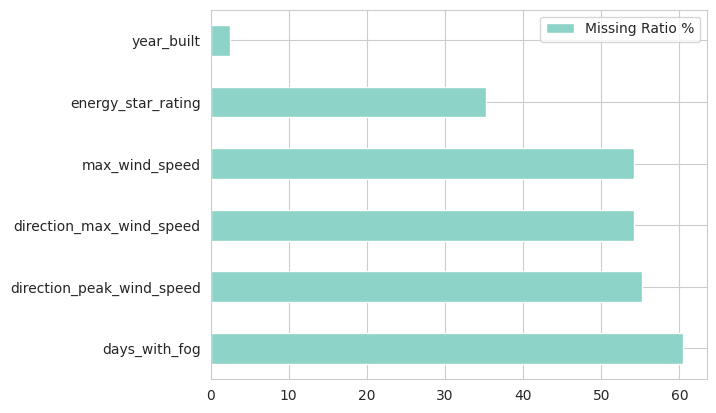

In [85]:
df = (train.isnull().sum() / len(train)) * 100      
df = df.drop(df[df == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio %' :df})
missing_data.plot(kind = "barh")
plt.show()

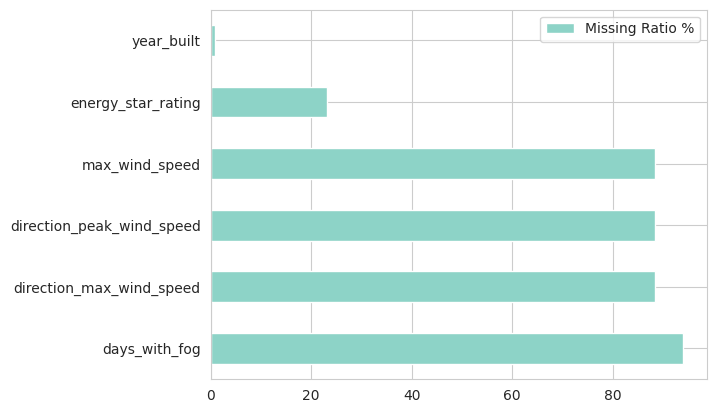

In [86]:
df = (test.isnull().sum() / len(test)) * 100      
df = df.drop(df[df == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio %' :df})
missing_data.plot(kind = "barh")
plt.show()

### Unique Values in the categorical columns of the Train Dataset
There are three categorical columns in the dataset: `facility_type`, `State_Factor` and `building_class`. From the plot below we find that :
- `facility_type` has 60 unique values
- `building_class` has 2 unique values
- `state_factor` has 7 unique values

We will need to convert these categorical values into numerical values for the model to be able to understand them.

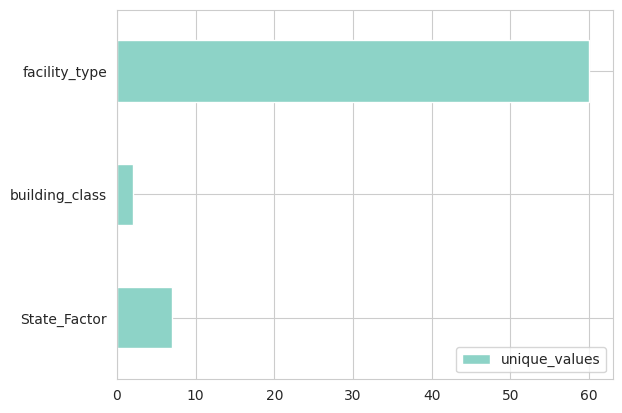

In [87]:
df_ = train.select_dtypes(exclude=['int', 'float'])
unique_data = {}
for col in df_.columns:
    unique_data[col] = len(df_[col].unique())
unique_data = pd.DataFrame.from_dict(unique_data, orient='index', columns=['unique_values'])
unique_data.plot(kind = "barh")
plt.show()


# Eda

### Distribution of the data of Each given factors in training set
 - The distribution of `floor_area` is skewed to the left with a long tail. The floor area varies between 900 square feet to 63K square feet
 - Most buildings were built around 1850 and 2000
 - Building elevations is skewed to the right with a long tail and most building are located at the elevation between 0 to 50.
 - Both `heating_degree_days` and `precipitation_inches` are approximately normally distributed.
 - Average temperature is right skewed with a short tail.
 - The rest of the factors are arbitrarily distributed.

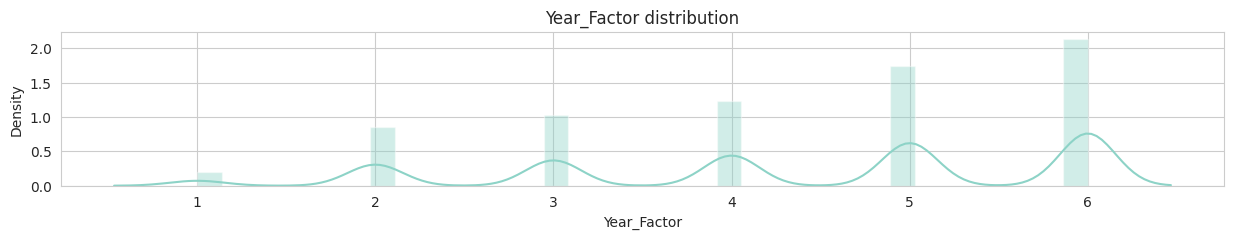

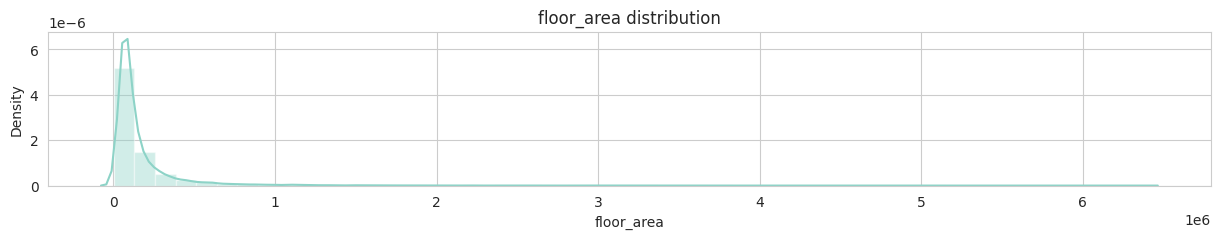

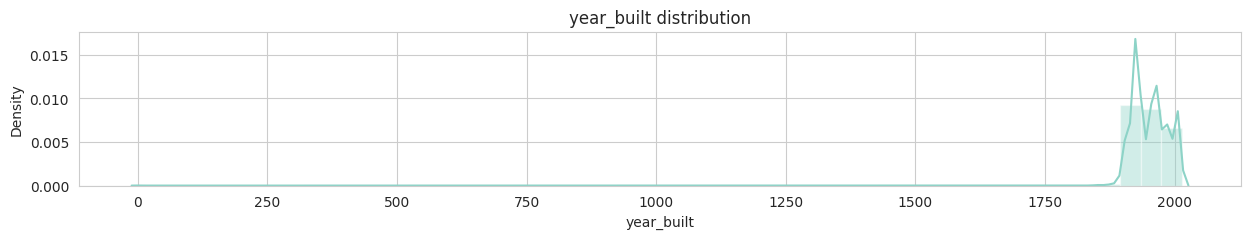

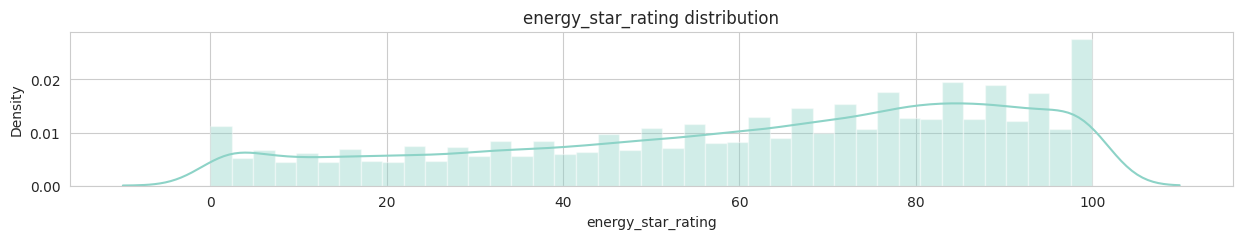

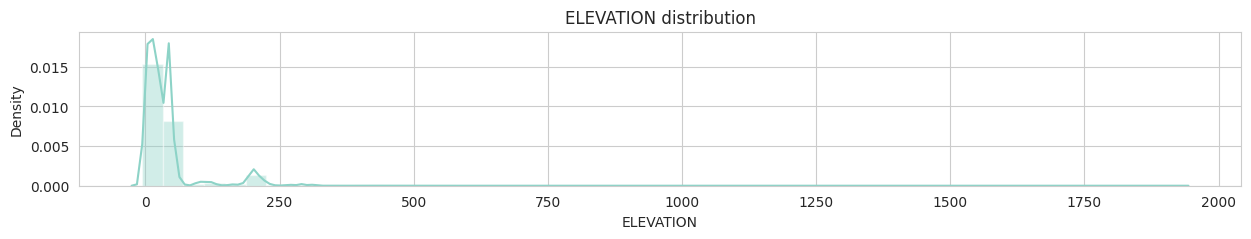

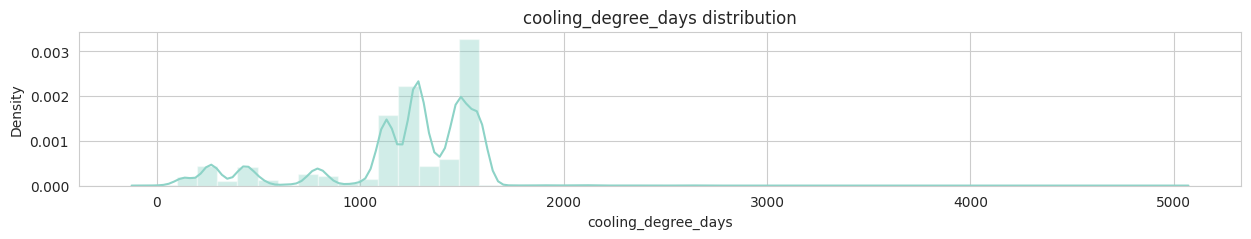

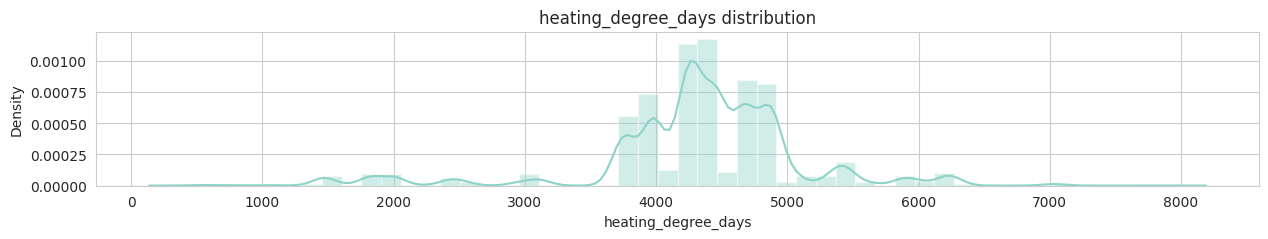

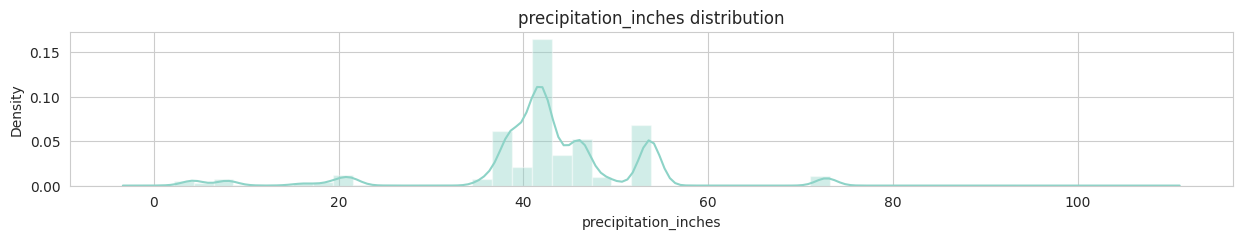

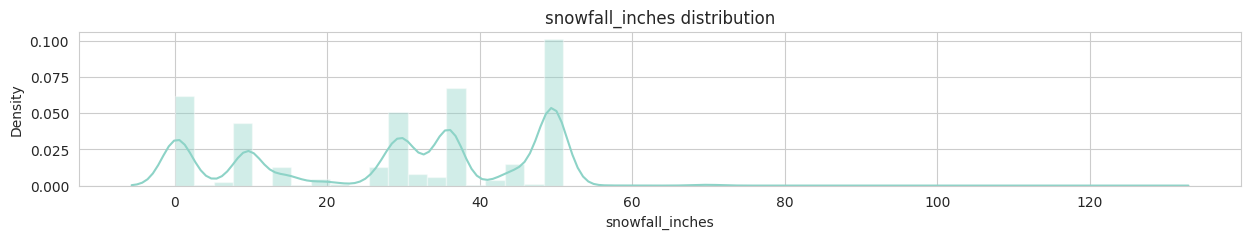

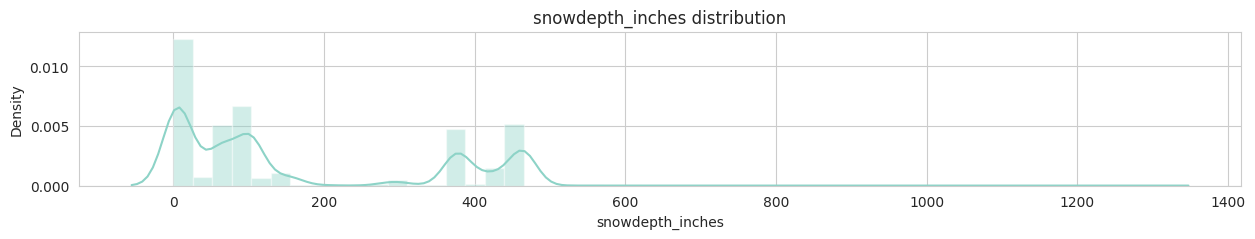

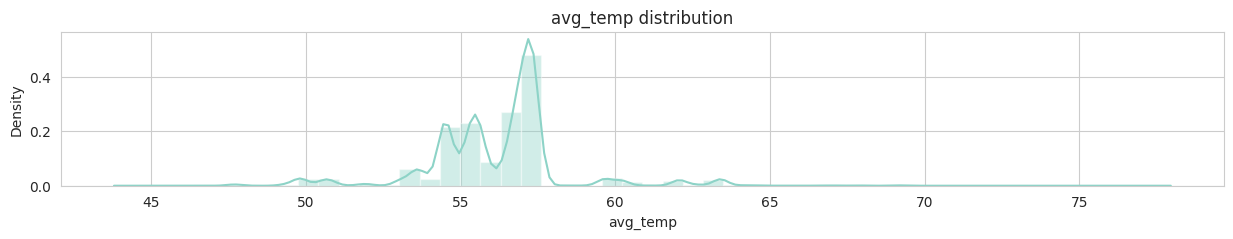

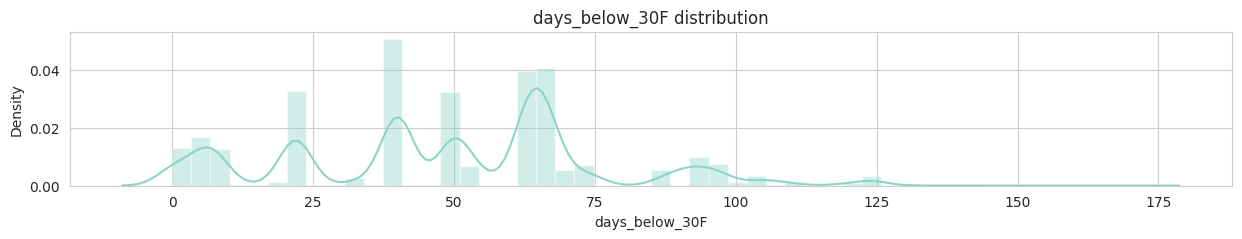

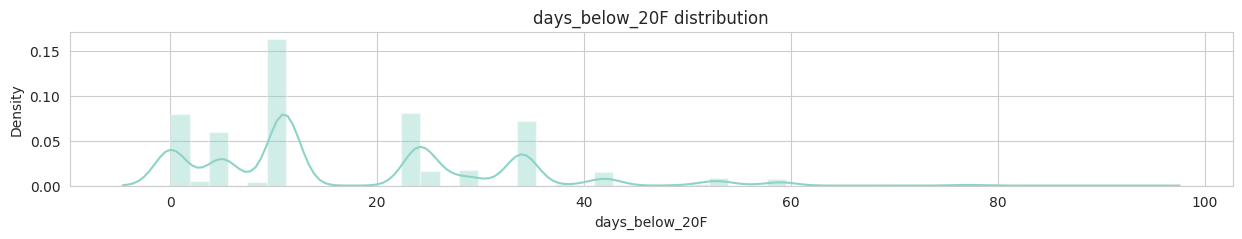

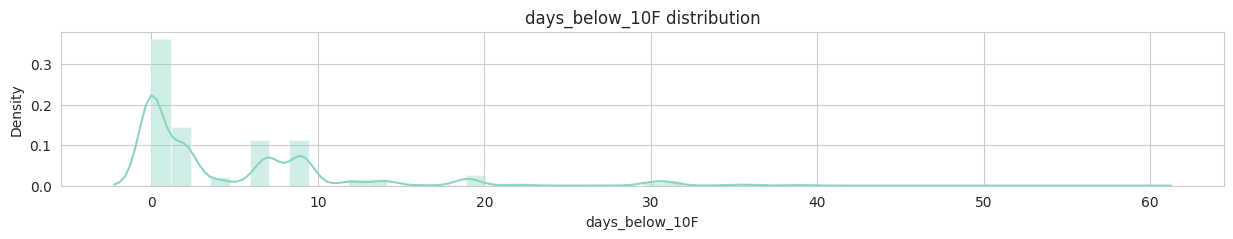

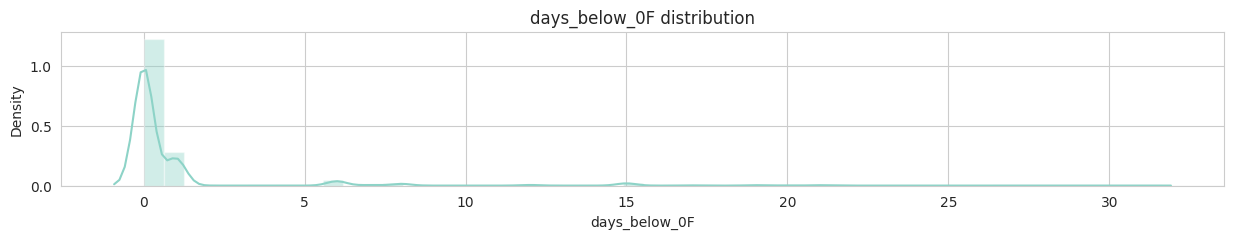

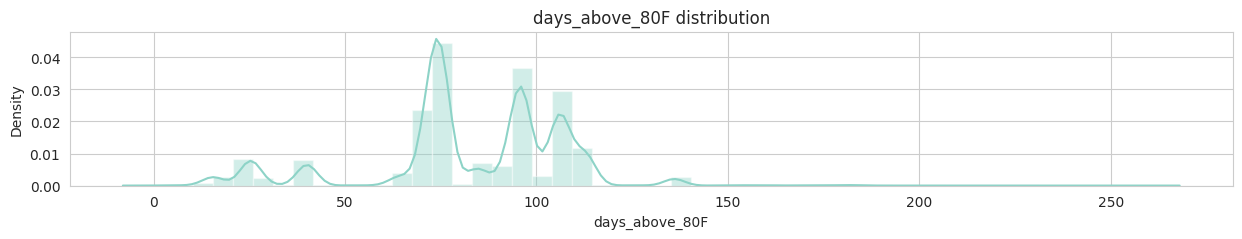

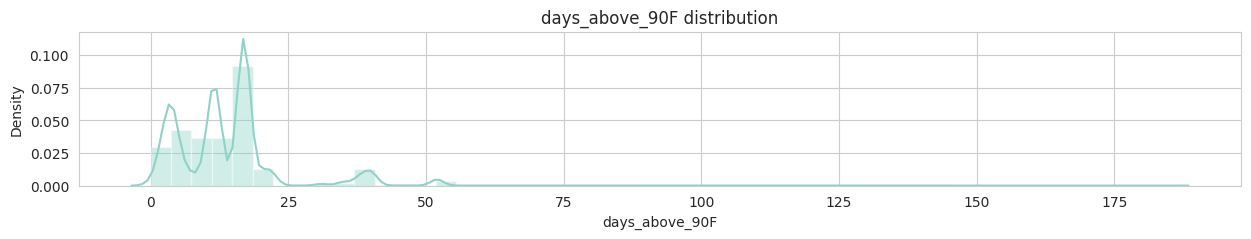

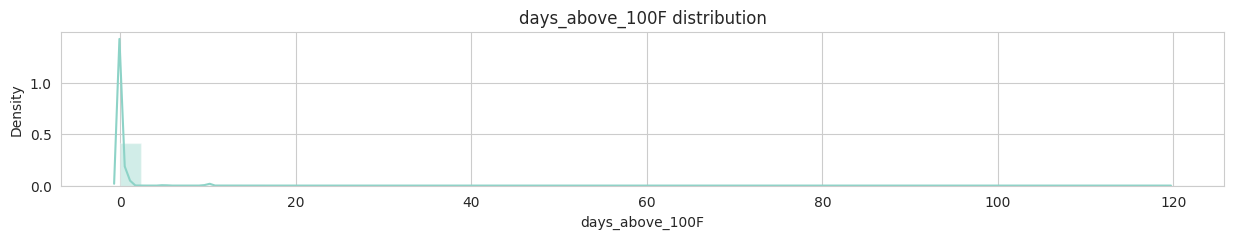

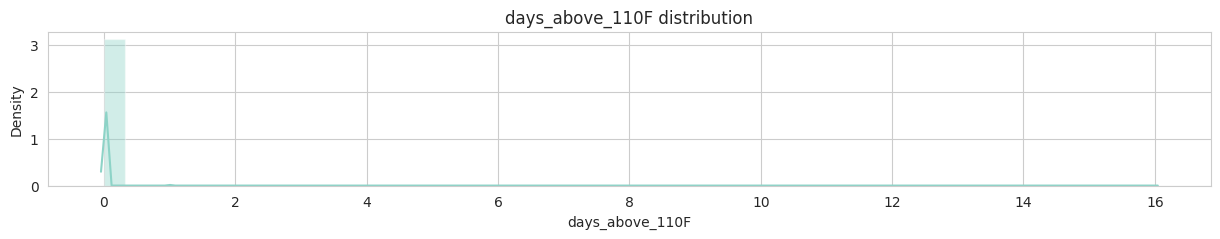

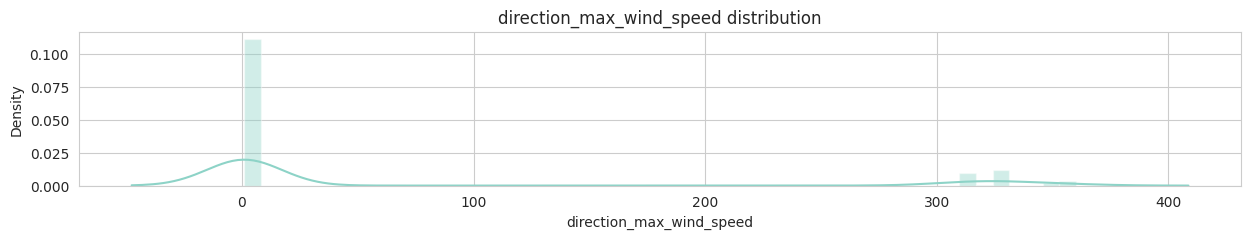

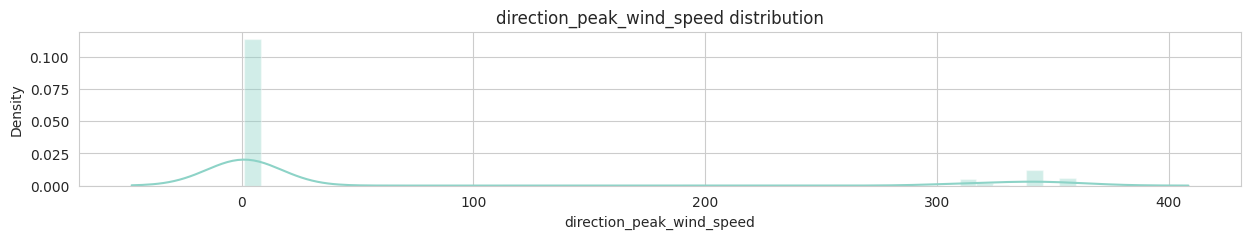

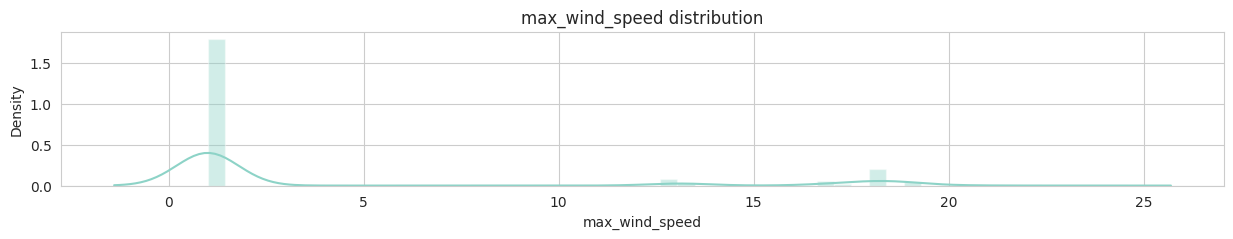

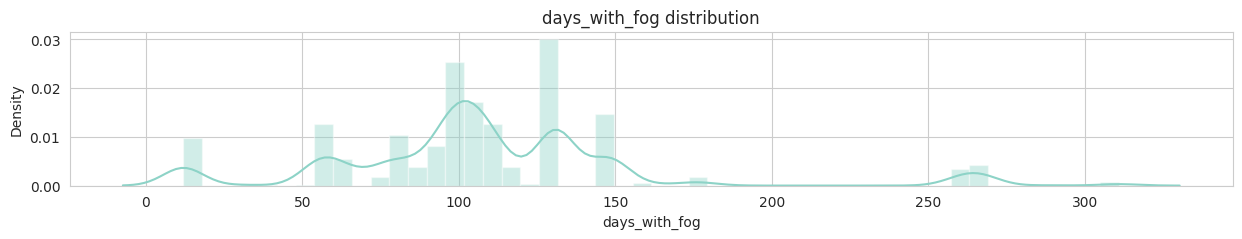

In [88]:
import warnings
warnings.filterwarnings('ignore')
cols=['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION',  'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
i=1
for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(train[col],kde=True)
    plt.title(col+" distribution")
    plt.show()
    

### Numerical Features Difference between train and test data
 - The biggest difference in the distribution of the train and test datasets is found in `wind speed data`. Wind relate data have over 50% missing data.
 - For the test dataset, the only available `year factor` is 7 - so there is no overlap
 - In case of `elevation` there is a sharp right skewed spike in data distribution of training dataset, which is not present in test dataset. 
 - Similar but opposite trend is observed in `snow_depth` and `snowfall_inches` data where there is a sharp right skewed spike in data distribution of testing dataset, which is not present in training dataset.
 - For rest of the factors, the training and test distributions mostly overlap with each other

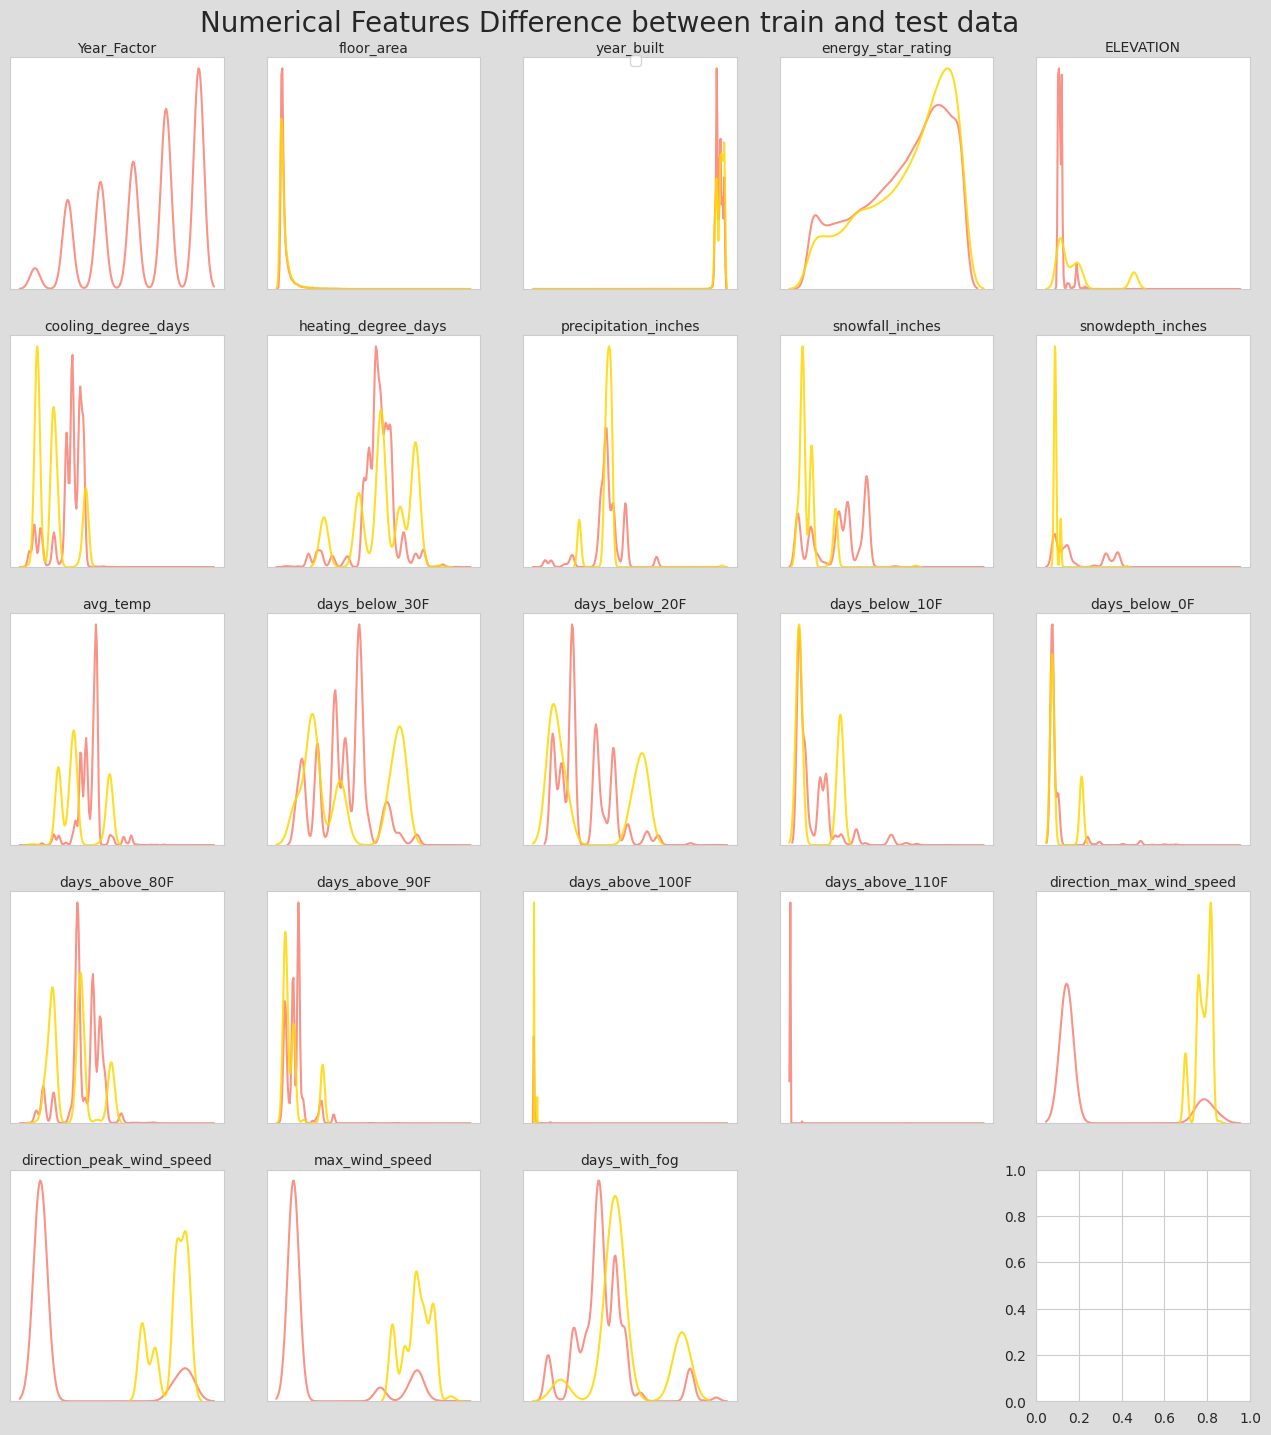

In [89]:

def dist_difference(train, test, features, title):    
    
    L = len(features)
    ncol= 5
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L
    
    fig, ax = plt.subplots(nrow, ncol,figsize=(16, 16), sharey=False, facecolor='#dddddd')
    ax.flat[-remove_last].set_visible(False)
    fig.subplots_adjust(top=0.95)
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        ax = sns.kdeplot(train[feature], shade=False,  color='salmon',  alpha=0.85, label='train')
        ax = sns.kdeplot(test[feature], shade=False, color='gold',  alpha=0.85, label='test')
        # ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        ax.xaxis.set_label_position('top')
        ax.set_ylabel('')
        ax.set_yticks([])        
        ax.set_xticks([]) 
        i += 1

    lines, labels = fig.axes[-1].get_legend_handles_labels()    
    fig.legend(lines, labels, loc = 'upper center',borderaxespad= 4.0)

    plt.suptitle(title, fontsize=20)
    plt.show()

dist_difference(train, test, cols, title='Numerical Features Difference between train and test data');

### Contrasting the presence of each statefactor in Train and Test class
Our test dataset and train dataset contains ratio of the data that are largely different from each other with respect to `state factor`

<AxesSubplot: ylabel='State_Factor'>

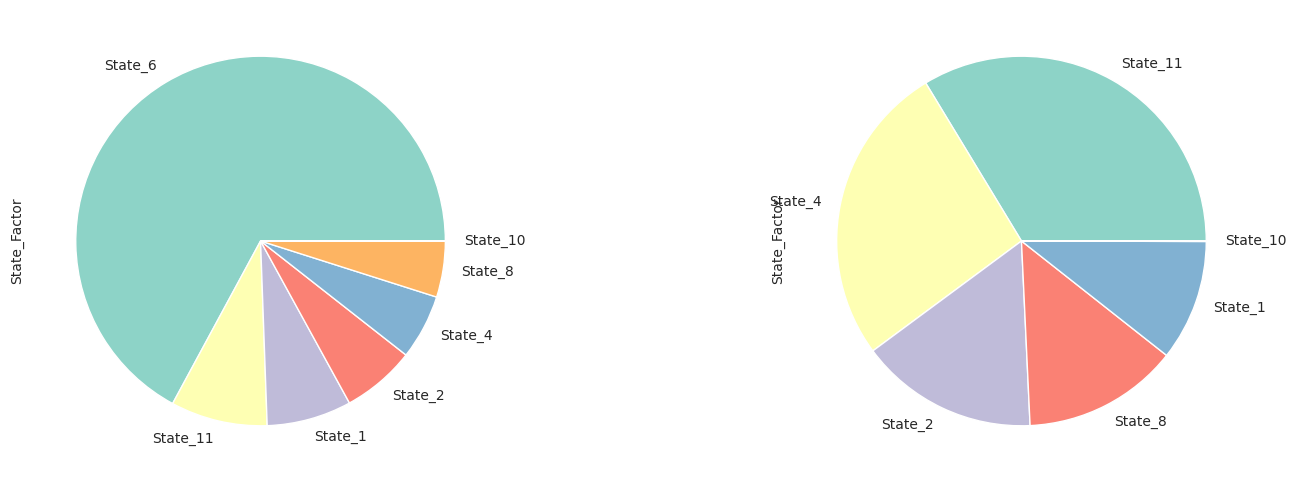

In [90]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) 
train['State_Factor'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2) 
test['State_Factor'].value_counts().plot(kind='pie')


### Comparison of State factors between Commercial and Residential building class

`state_factors` are mainly the anonymized states from which these data were collected. We can see that `state_6` is the most data-rich state while `state_10` have almost negligible amount of data comparing with `state_6`. So, it is safe to assume that whatever we may be trying to predict here may give us a more accurate result for buildings that are situated at similar states akin to `state_6`.

<AxesSubplot: xlabel='State_Factor', ylabel='count'>

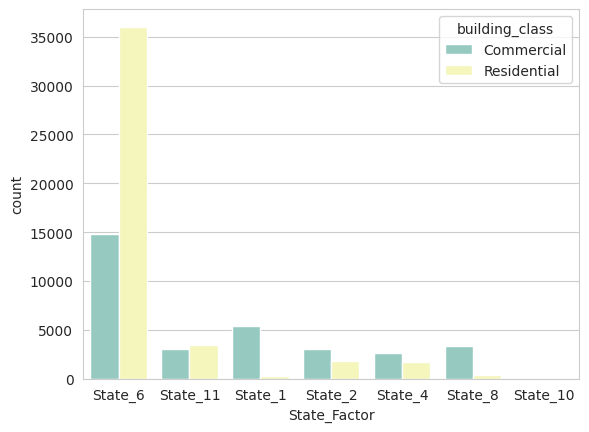

In [91]:
sns.countplot(x='State_Factor',hue='building_class',data=train,order = train['State_Factor'].value_counts().index)

### Correlation of all the rows among each other

This plot shows the correlation of different factors that were presented in the dataset where lightest point shows the highly correlated datapoints and darkest point showed the least correlated datapoints. From here it is safe to assume several assumption:
1. Elevation is not a huge factor behind the weather data collected for each buildings.
2. `year_built` has a surprisingly high correlation with the `days_above_110F`. This is a good example of correlation is not causation.
3. `energy_star_rating` has high correlation with the hotter areas.
4. Precipitation has a negative correlation with `avg_temp`, So this area has to be on the northern hemisphere.

<AxesSubplot: >

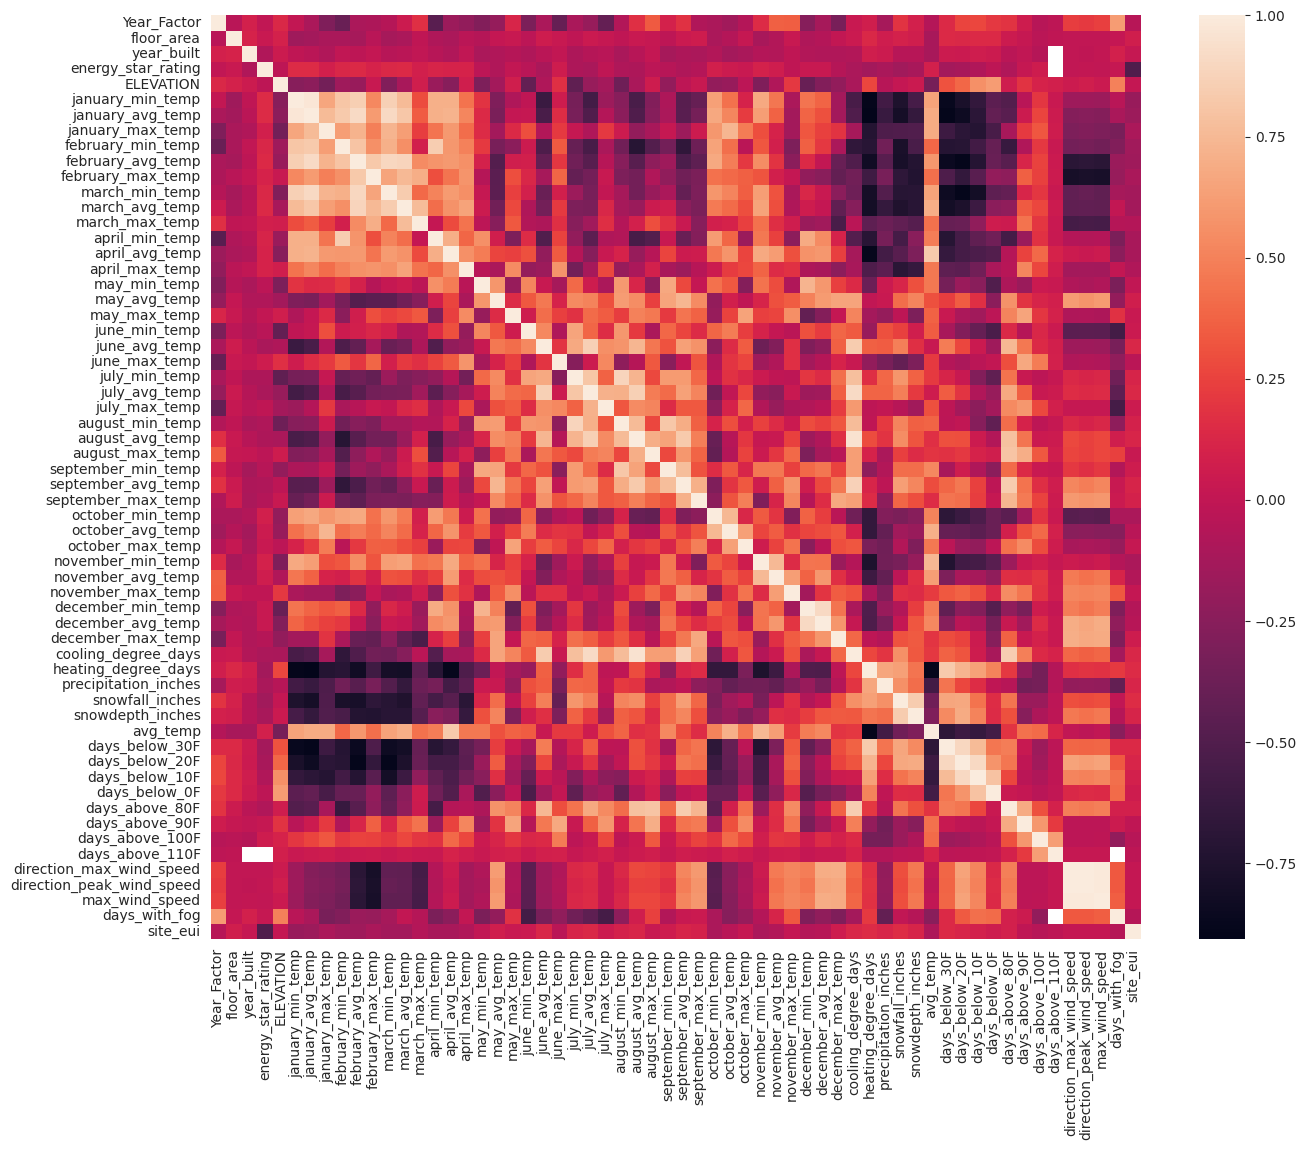

In [92]:
x = train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(x)

### The Number of buildings built in each year (In the dataset)
While some year datapoints had unusually high number of presence in the dataset, On average, from the plot below, it is safe to assume that the given dataset has a good distribution of datapoints over several decades.

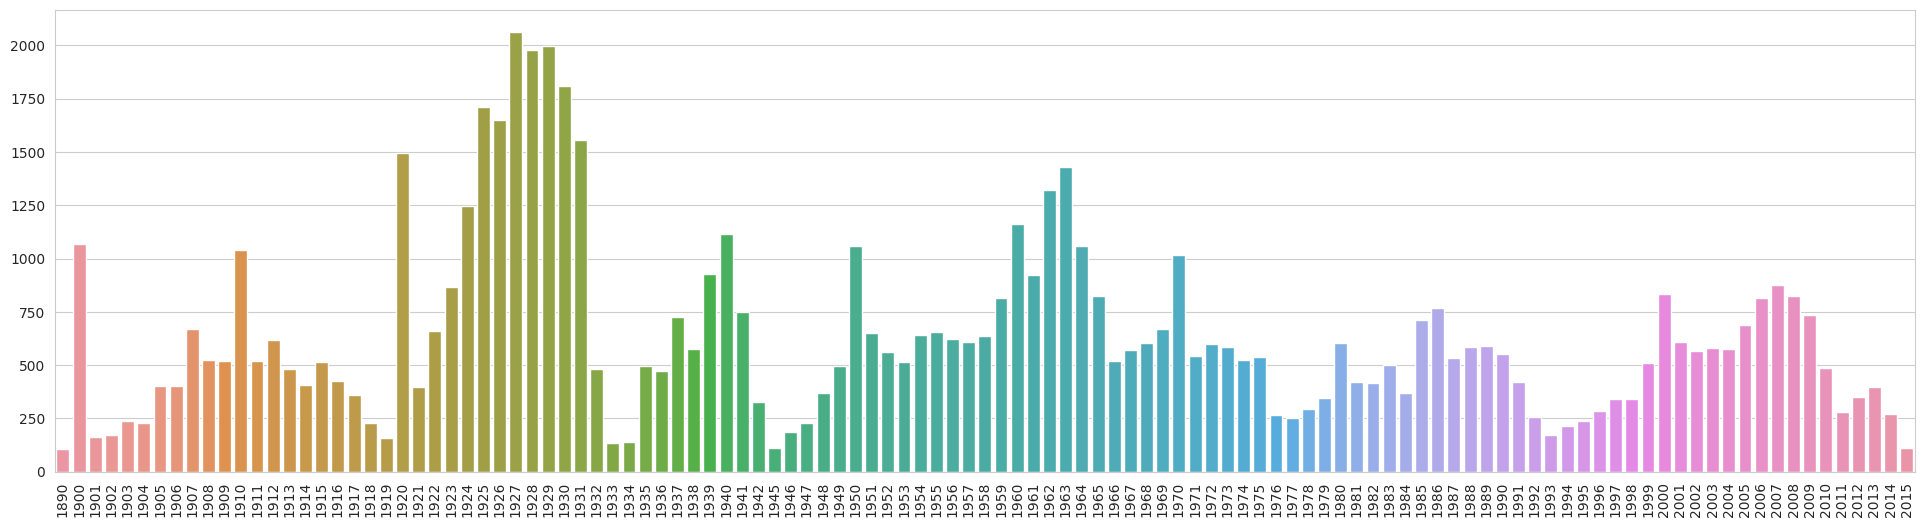

In [93]:
from collections import Counter
x = Counter(train.year_built)
x = sorted(x.items())

years = []
data = []

for i in x:
    if(i[1]>100):
        years.append(int(i[0]))
        data.append(i[1])
plt.figure(figsize=(24,6))
sns.barplot(x=years,y=data)
plt.xticks(rotation=90)
plt.show()

### Contrasting Site EUI with State Factor
Site EUI represents Site Energy Usage Intensity which is the amount of heat and electricity consumption of a building as reflected in Utility bills. This plot shows the distribution of SITE EUI for each state factor. This was plotted on log scale as the range for the `site_eui` data is pretty huge while containing extreme outliers. From this figure below, if we can ignore the extreme outliers, it can be seen that the `site_eui` data follows a normal distribution pattern, although some `state_factor` experience a higher number concentration of `site_eui` value in the center than the others.

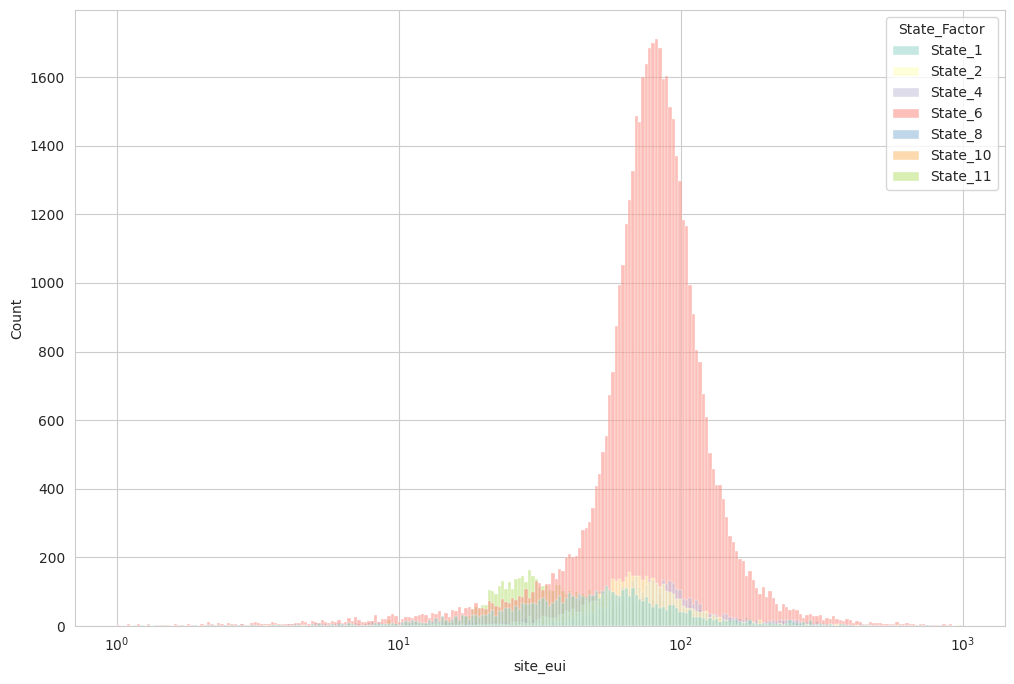

In [94]:
df = pd.DataFrame(train[train['building_class']=='Commercial'][['site_eui','floor_area','year_built','ELEVATION','State_Factor','facility_type']].sort_values(by=['site_eui']).tail(200))
df.dropna()
plt.figure(figsize=(12,8))
sns.histplot(data = train, x = "site_eui",hue='State_Factor', log_scale=10)
plt.show()

### Boxplot of SITE EUI with respect to STATE FACTOR

Percentiles are good measure of explaining the skews a dataset may be experiencing for certain datapoints. In the plot below we can see that `state_2`, `state_1`, `state_11` have even distributions of collected `site_eui` data for each states. Meaning, these areas contain an even distribution of buildings with similar number of buildings that have a very high number of energy usage intensity annd buildings that have a low number of energy usage intensity. These states should also have a similar number of residential and commercial buildings and this assumption is true if we observe the plot for `Comparison of State factors between Commercial and Residential building class`.

On the other hand, `state_6`, `state_4` and `state_8` have a higher concentration of buildings with comparably lower amount of energy usage intensity. This signifies that the data collected for these areas are likely residentials.

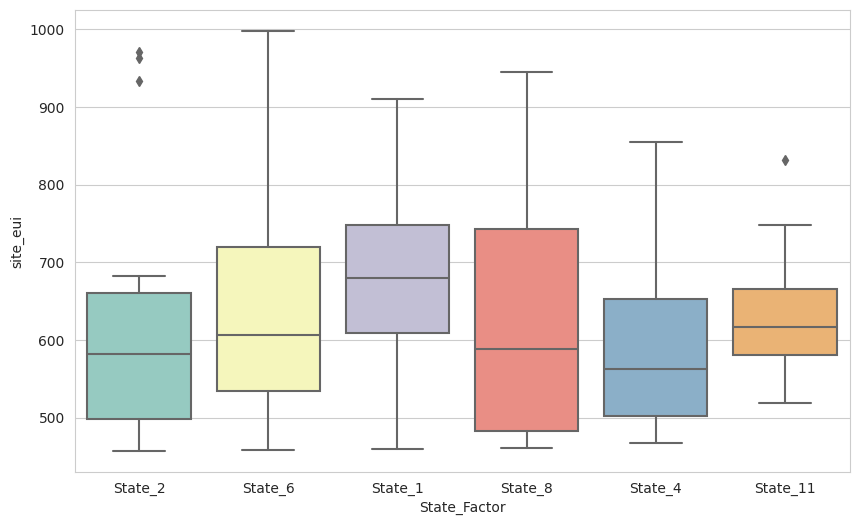

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x="State_Factor",
            y="site_eui",
            data=df)
plt.show()

### Lineplot of minimum temperature per month with respect to State Factor
- As expected, Electricity demand for cooling is significantly affected by climate and weather, Cooling in the Summertime, heating in Wintertime, and between we have Spring and fall.
- State 4 seems to be having the lowest min temperature among other states 
- It appears that, in comparison to other states, state 11 has a moderate temperature. The temperature trend line reveals that State 11's lowest and maximum temperatures range from the lower 30s to the upper 50s and from the upper 60s to the upper 90s, respectively.
- Media temperature for state 10 is higher than the rest of the states

<AxesSubplot: xlabel='month', ylabel='temp_min'>

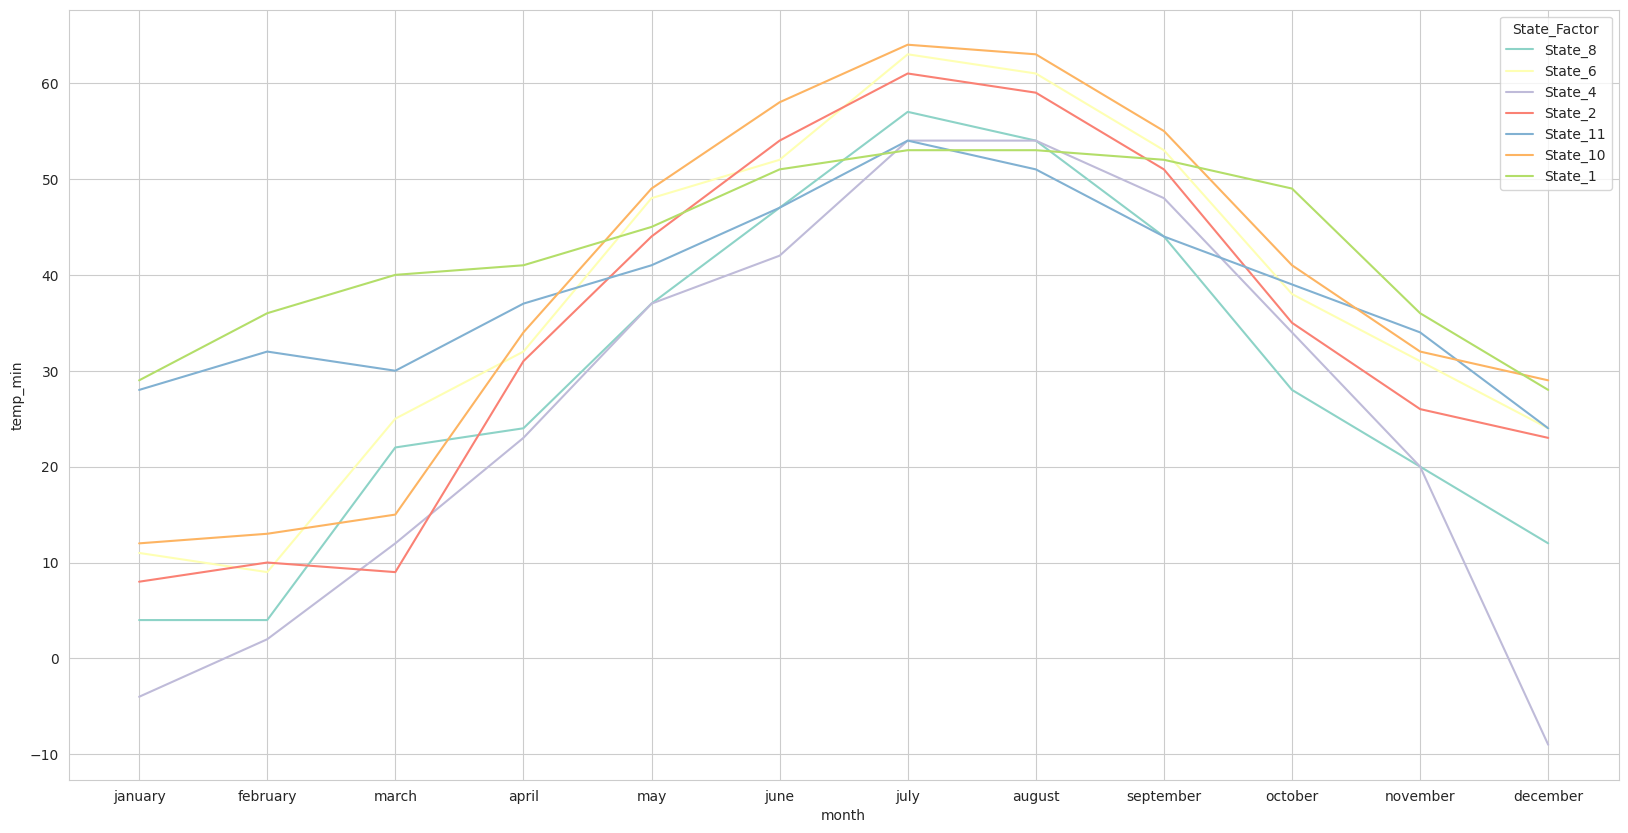

In [96]:
minimum_temp_columns = train[['State_Factor','january_min_temp', 'february_min_temp', 'march_min_temp', 'april_min_temp',
       'may_min_temp', 'june_min_temp', 'july_min_temp', 'august_min_temp', 'september_min_temp',
       'october_min_temp', 'november_min_temp','december_min_temp']].set_index('State_Factor')
min_temp_data = minimum_temp_columns.unstack().reset_index().rename(columns = {0:'temp_min', 'level_0': 'month'})

statewise_min_temp = min_temp_data.groupby(['month', 'State_Factor'])['temp_min'].agg('median').reset_index()
# parse the month column
month = ['january', 'february', 'march', 'april','may', 'june', 
         'july', 'august', 'september','october', 'november','december']
statewise_min_temp['month'] = statewise_min_temp['month'].apply(lambda x: x.split('_')[0])
statewise_min_temp['month'] = pd.Categorical(statewise_min_temp['month'], categories = month, ordered = True)
statewise_min_temp.sort_values(by = 'month', inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(x='month', y='temp_min', hue='State_Factor', 
             data=statewise_min_temp)

### Contrasting the status of heating and cooling days with respect to SITE EUI and State Factor

<AxesSubplot: xlabel='heating_degree_days', ylabel='site_eui'>

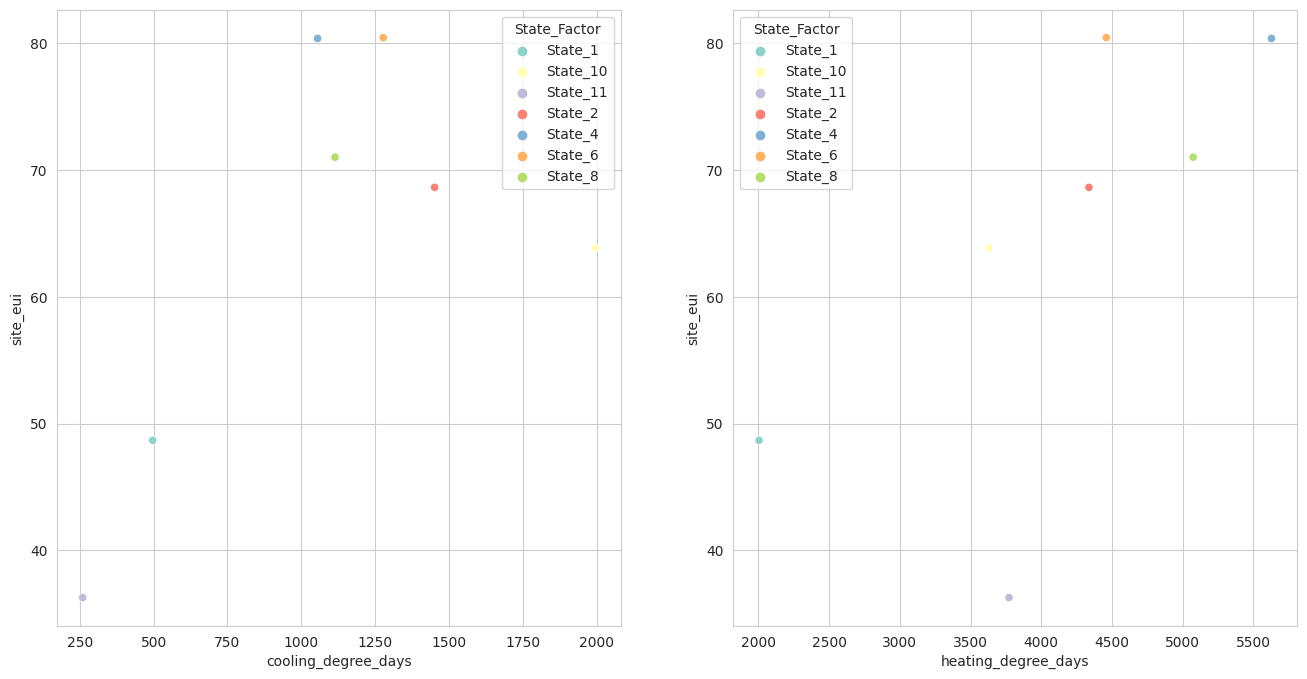

In [97]:
degree_days = train.groupby('State_Factor').agg({'cooling_degree_days': 'median', 
                                              'heating_degree_days': 'median', 
                                              'site_eui': 'median'}).reset_index()
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='cooling_degree_days', y='site_eui', hue='State_Factor', data=degree_days)
plt.subplot(1, 2, 2)
sns.scatterplot(x='heating_degree_days', y='site_eui', hue='State_Factor', data=degree_days)

### Distribtuion of Top 10 facilities in buildings

50% of our training dataset are for multifamily residents while only 1% data are for Educational institutions, Retail shops and warehouses. It's safe to assume that we will have a better capability of understanding the behavior of energy usage of residential buildings from the given dataset.

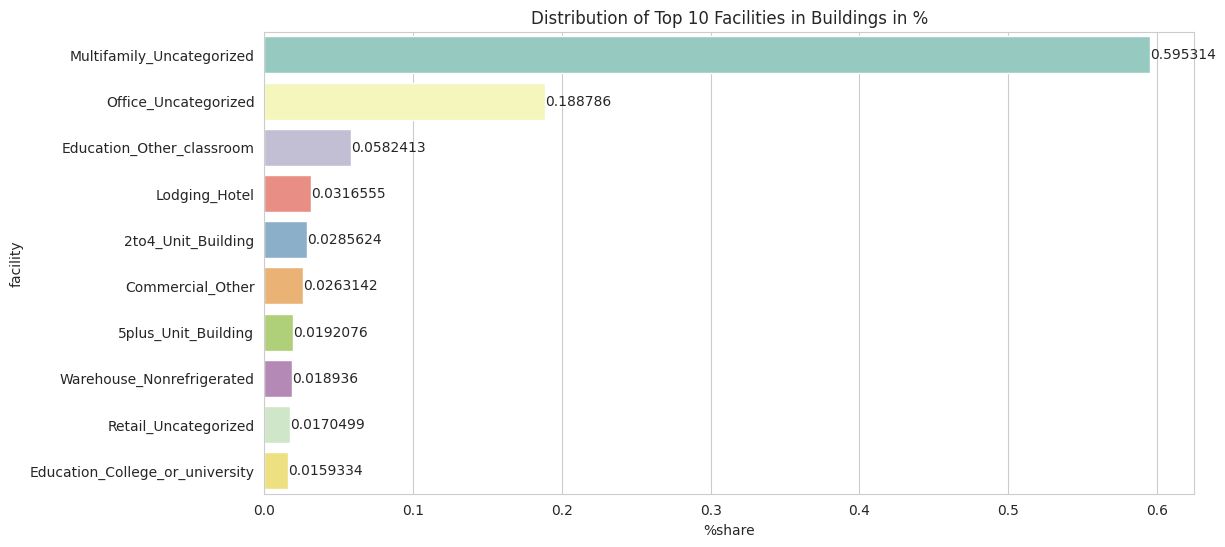

In [98]:
df = pd.DataFrame(train['facility_type'].value_counts().head(10))
df['facility'] = df.index
df.rename(columns = {'facility_type':'count'}, inplace = True)
df['%share'] = df['count']/df['count'].sum()
df.drop(columns=['count'],inplace=True)
df.reset_index(drop=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(y='facility',x='%share',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Distribution of Top 10 Facilities in Buildings in %")
plt.show()  

### Contrasting the distribution of facility type of each building class

There are only 6 type of residential facility buildings available in the dataset. The rest are all commercial buildings. This is a good sign as we can assume that the dataset is more likely to have a better understanding of the energy usage of commercial buildings. 

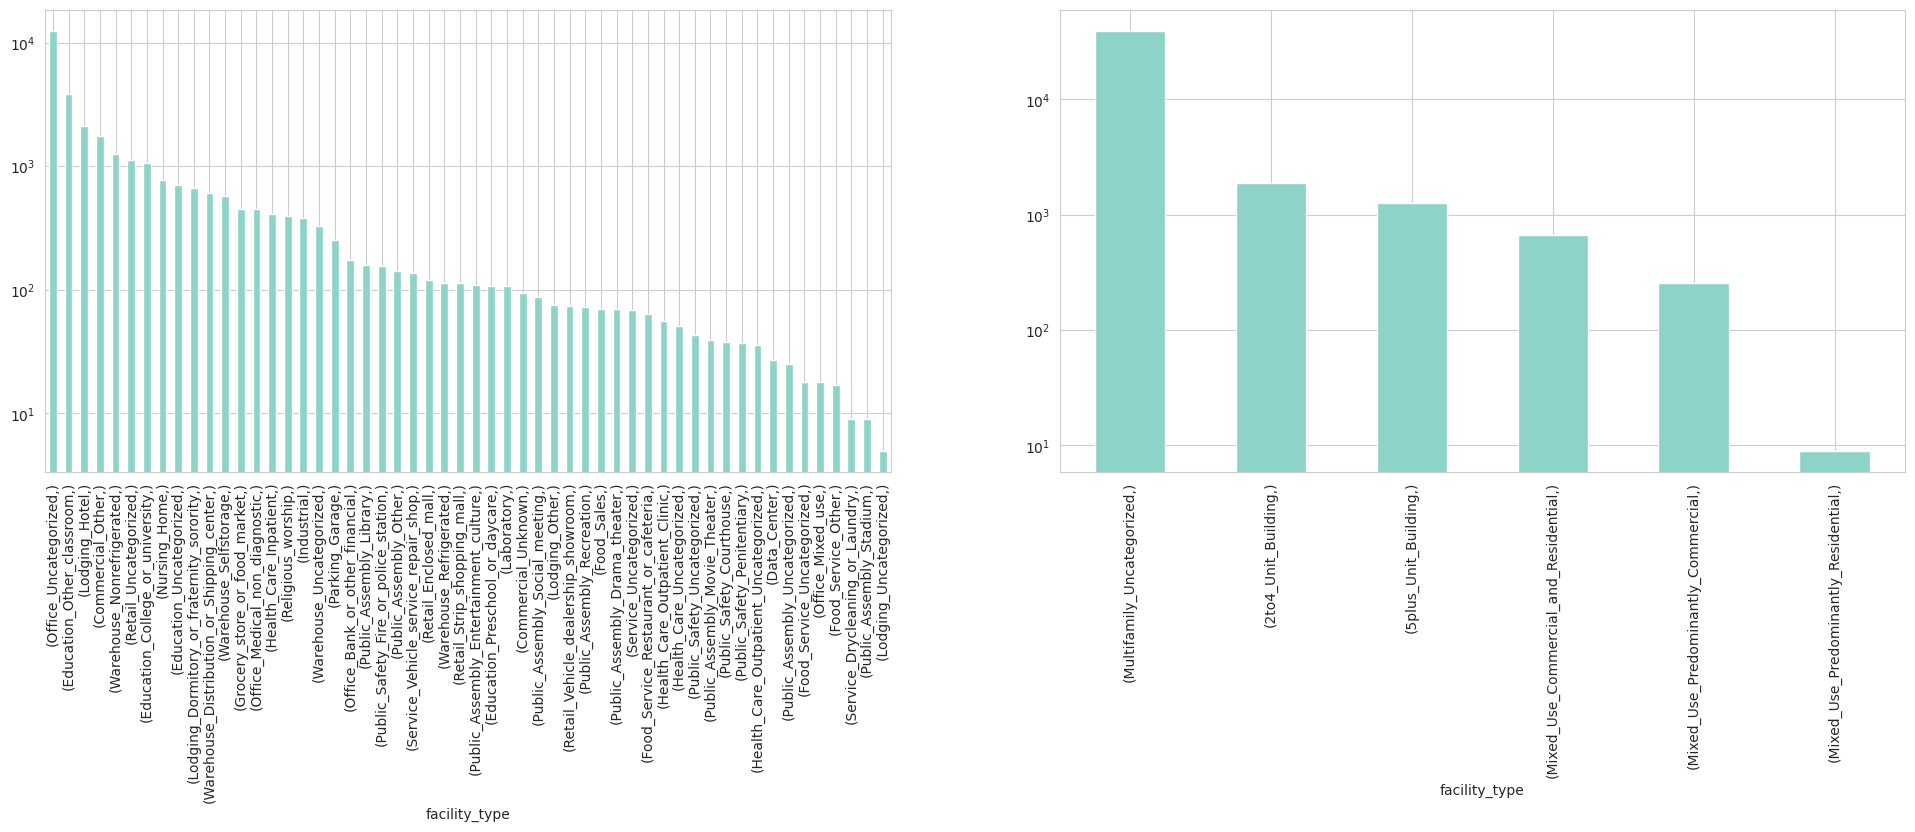

In [99]:
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
train[train['building_class']=='Commercial'][['facility_type']].value_counts().plot(kind='bar', logy=True)

plt.subplot(1, 2, 2)
train[train['building_class']=='Residential'][['facility_type']].value_counts().plot(kind='bar', logy=True)

plt.show()

In [100]:
train[train['building_class']=='Residential'][['facility_type']].value_counts()

facility_type                       
Multifamily_Uncategorized               39455
2to4_Unit_Building                       1893
5plus_Unit_Building                      1273
Mixed_Use_Commercial_and_Residential      672
Mixed_Use_Predominantly_Commercial        256
Mixed_Use_Predominantly_Residential         9
dtype: int64

### Contrasting the distribution of ENERGY STAR RATING of each building class

The Building Energy Star rating is usually high for buildings that have low eui. Another observation here is that state factor 10 is missing for Residential buildings. 

<AxesSubplot: xlabel='energy_star_rating', ylabel='site_eui'>

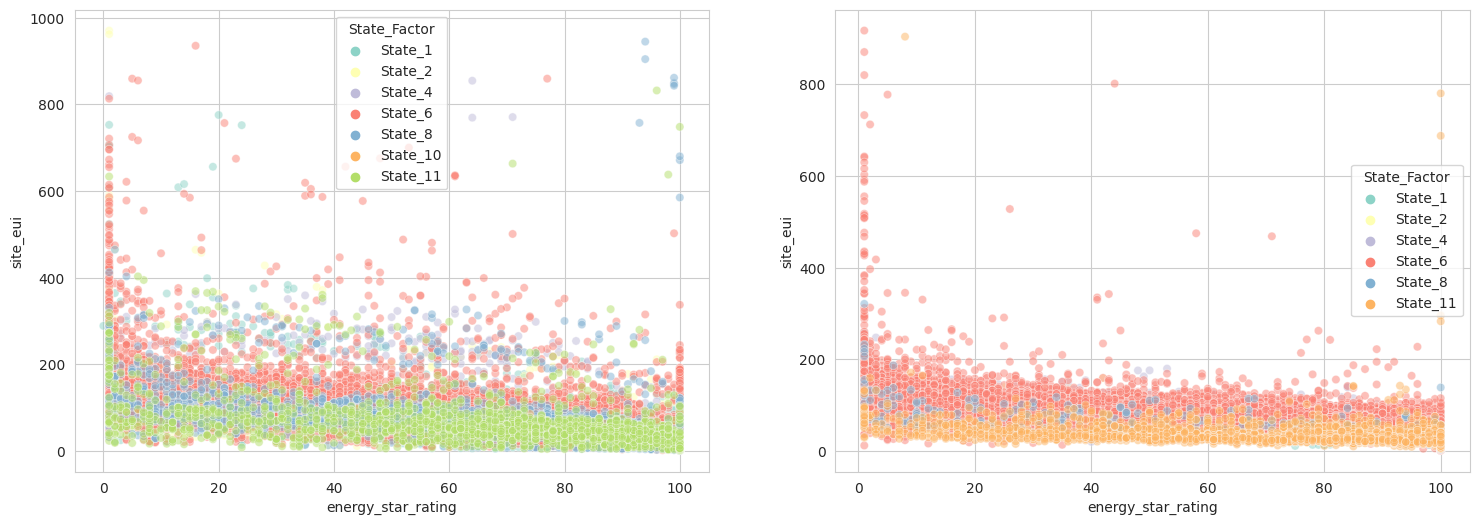

In [101]:
plt.figure(figsize=(18,6))
com_train = train[train['building_class']=='Commercial']
res_train = train[train['building_class']=='Residential']
plt.subplot(1, 2, 1)
sns.scatterplot(data=com_train, x="energy_star_rating", y="site_eui", hue="State_Factor", alpha=0.5)

plt.subplot(1, 2, 2)
sns.scatterplot(data=res_train, x="energy_star_rating", y="site_eui",  hue="State_Factor", alpha=0.5)


### Scatterplot of SITE EUI Values in accordance of their year built  in the training data

From the range and percentile value of `site_eui` over years, we can see that, over years the range of `site_eui` is greatly increased. This trend can be attributed to the electrical appliances and machinaries that we have started using over years. Especially since the 1980s, the increase of `site_eui` has been observed significantly.

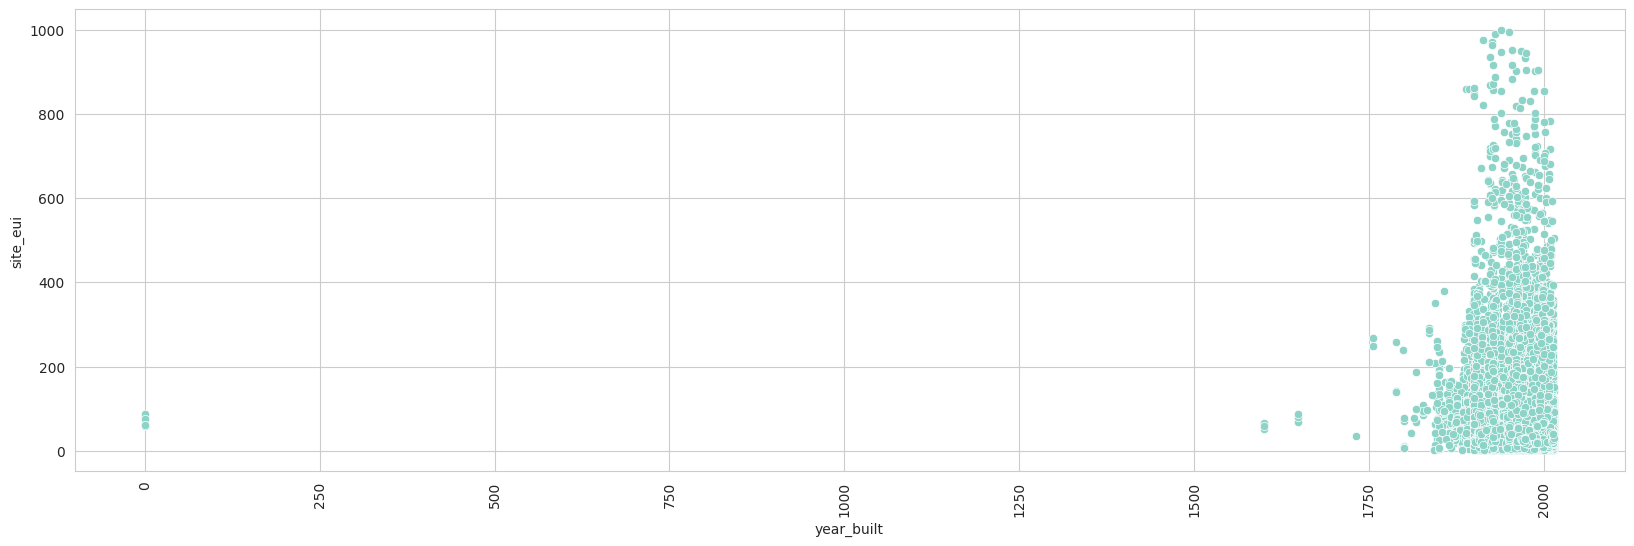

In [113]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="year_built",
            y="site_eui",
            data=train)
plt.xticks(rotation=90)
plt.show()

### Boxplot of SITE EUI Values in accordance of their year factor
From the plot below it is evident that - year factor contributes very little to the variation of SITE EUI values and remains the same across all values of year factor.

Text(0.5, 1.02, 'Year wise site eui')

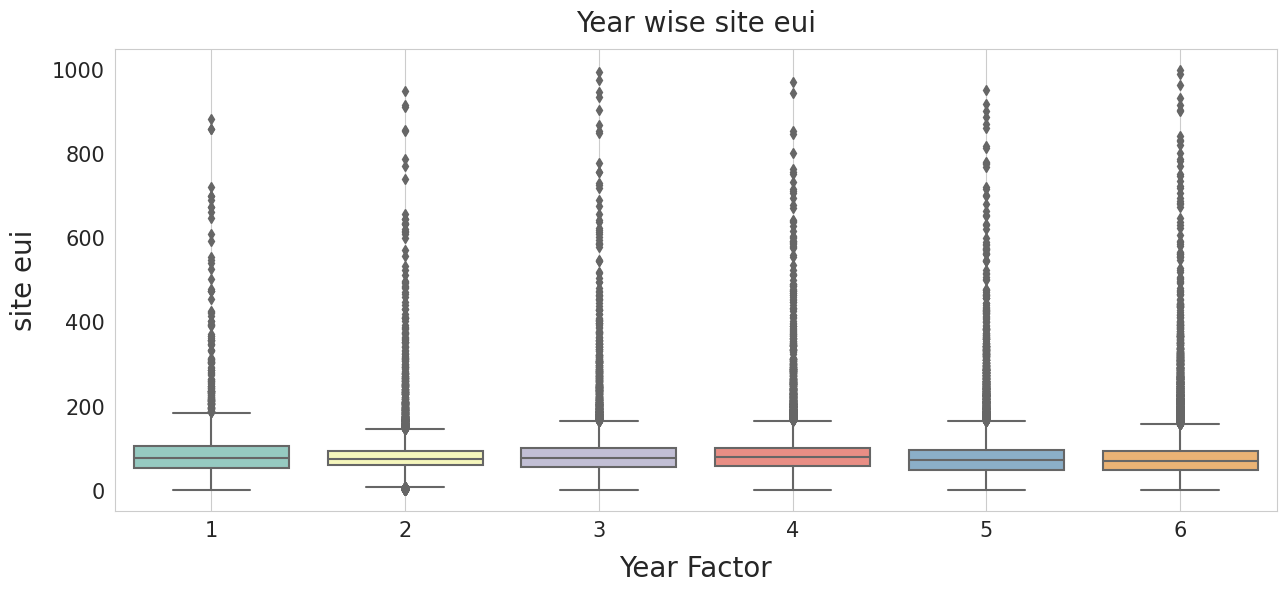

In [105]:
plt.figure(figsize = (15,6))
df = train
sns.boxplot(x = df['Year_Factor'], y= df['site_eui'])
plt.xlabel("Year Factor", labelpad=10, fontsize=20)
plt.ylabel("site eui", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Year wise site eui", y=1.02, fontsize=20)

### Floor area distribution of Each Building class

The plot below shows a very significant trend. It shows the `site_eui` generally ranges from extremely high to really low for both commerical and residential areas but larger commercial areas always have a very low amount of `site_eui`. This means that while residential areas are smaller than commercial areas, due to usage of appliances, utility bills are always significantly higher for residential areas and big commercial warehouses don't need that much weather control inside. Additionally, the floor area outliers are mainly related to commercial buildings

In [106]:
train['floor_area'].describe()

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

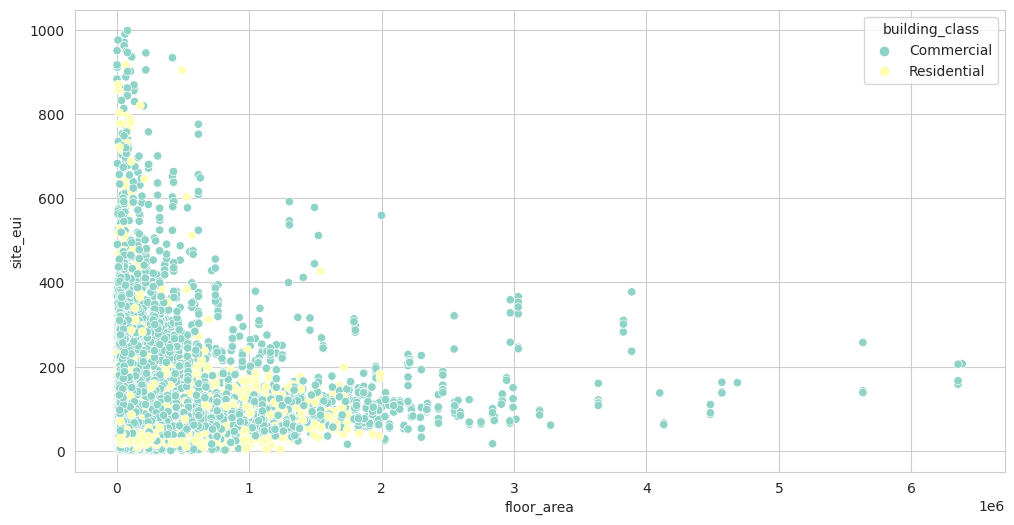

In [107]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train,x='floor_area',hue='building_class',y='site_eui')
plt.show()

### Contrasting floor area with energy star rating for training and test set

Energy stars signifies the efficiency of energy consumption in a building. From the plots below, we first notice that, `State factor` 6 is missing in the test data. Besides that the distribution of datapoint across floow area and energy star rating seems to follow the same trends and range, with some outliers.


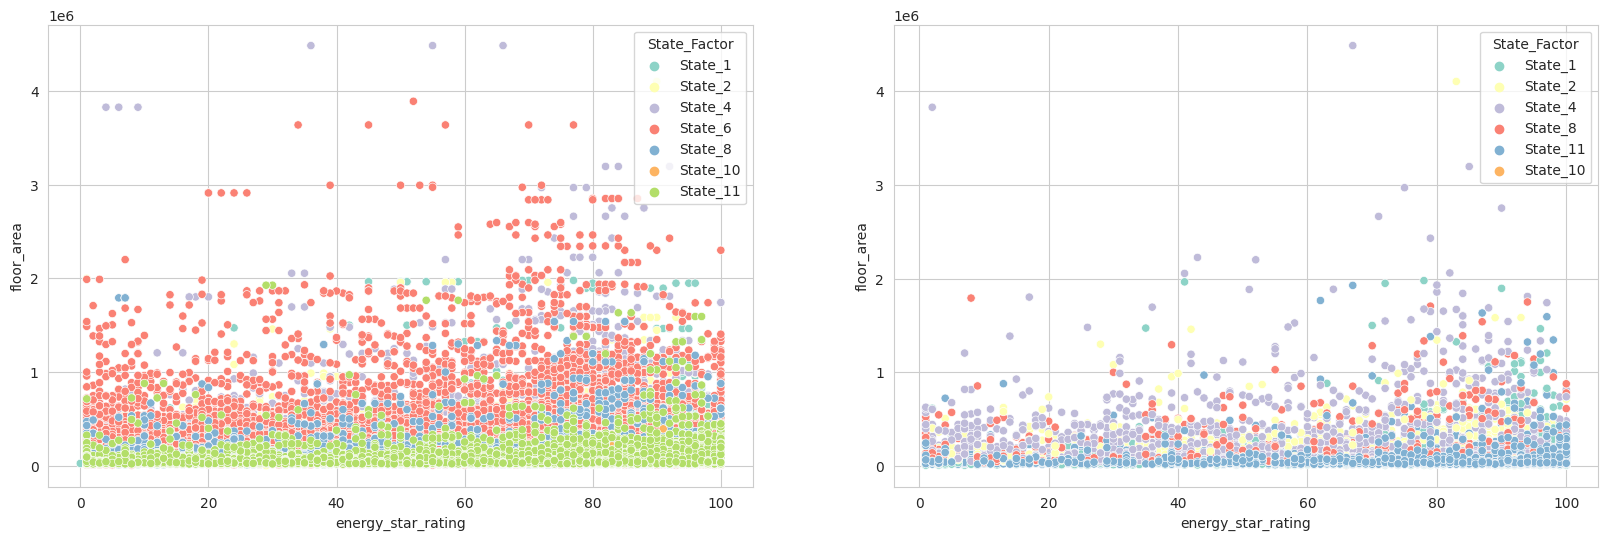

In [108]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train,y='floor_area',hue='State_Factor',x='energy_star_rating')

plt.subplot(1,2,2)
sns.scatterplot(data=test,y='floor_area',hue='State_Factor',x='energy_star_rating')
plt.show()

#### Floor area of 50K square feet and above tend to have high median site_eui.

<AxesSubplot: xlabel='floor_area', ylabel='site_eui'>

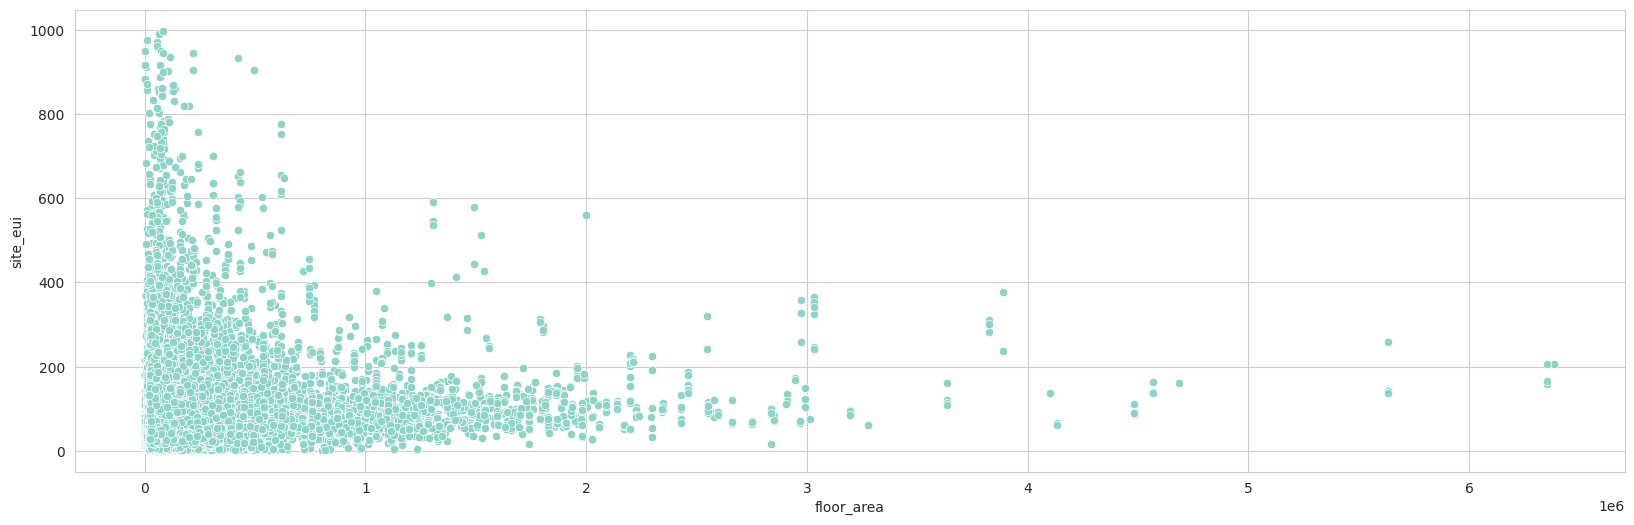

In [109]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=train,x='floor_area',y='site_eui')


### Contrasting Elevation of different building classes 
Commercial buildings make up the majority of the structures located over 300 feet (elevation)! However, as there are no residential structures over 500 feet (Elevation), commercial structures are what the Elevation variable's outliers are tied to.

<AxesSubplot: xlabel='building_class', ylabel='ELEVATION'>

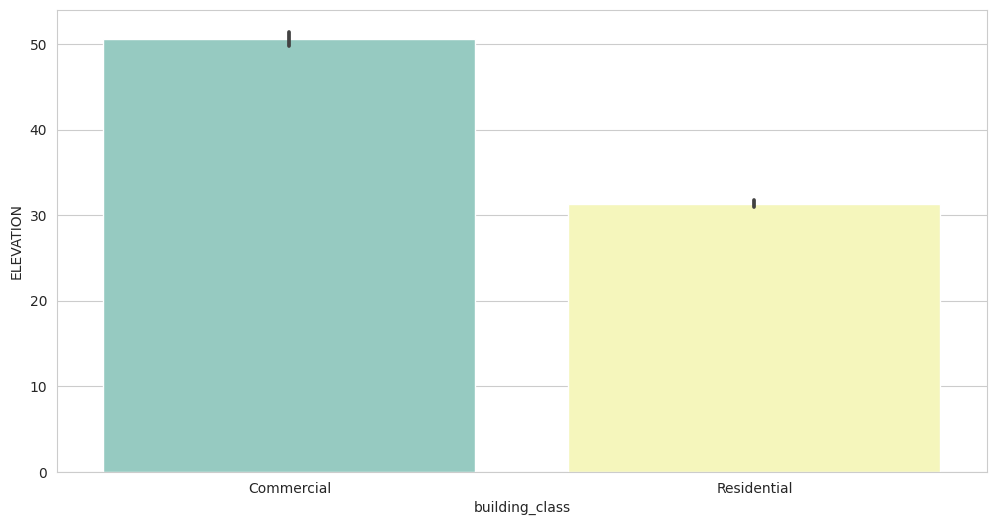

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x='building_class',y='ELEVATION',data=train)

### Contrasting Elevation of different building classes with their EUI

Elevation is also a noticably big factor for `site_eui`. Areas that are most closely located to the ground have a higher amount of air circulation control than the areas that are high above ground which incurs them a very low amount of utility bills.
From the plot we see that buildings below 300 (elevation) are using more energy. So, more significant energy users (like Data warehouses) can be suggested to be placed high up in the buildings.

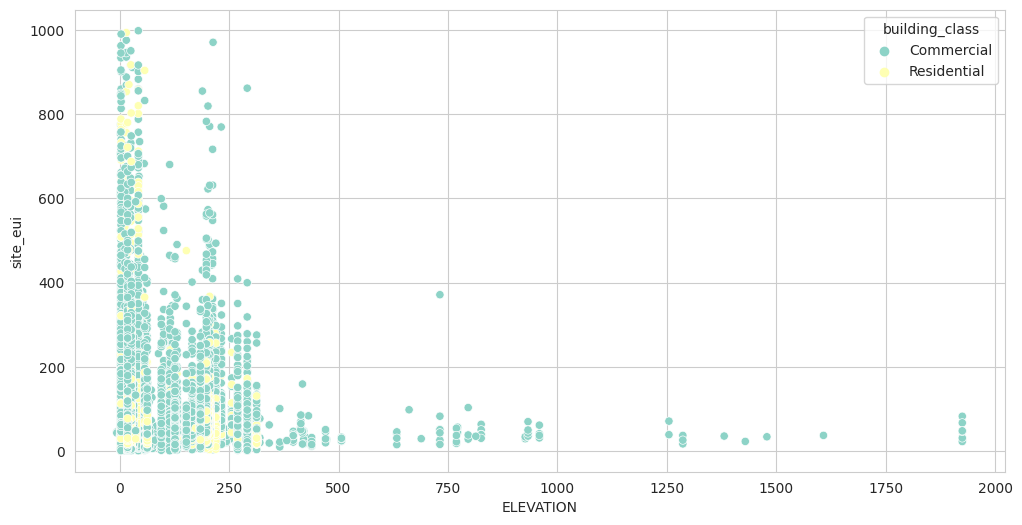

In [111]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=train, x="ELEVATION", y="site_eui",hue='building_class')
plt.show()

### Contrasting the distribution of SITE_EUI across different facility types 
On average, grocery_store/food_market, data_centers, and laboratory have higher site_eui. These facilities are usually larger than the rest of the facilities and/or have higher user concentration.

<AxesSubplot: xlabel='site_eui', ylabel='facility_type'>

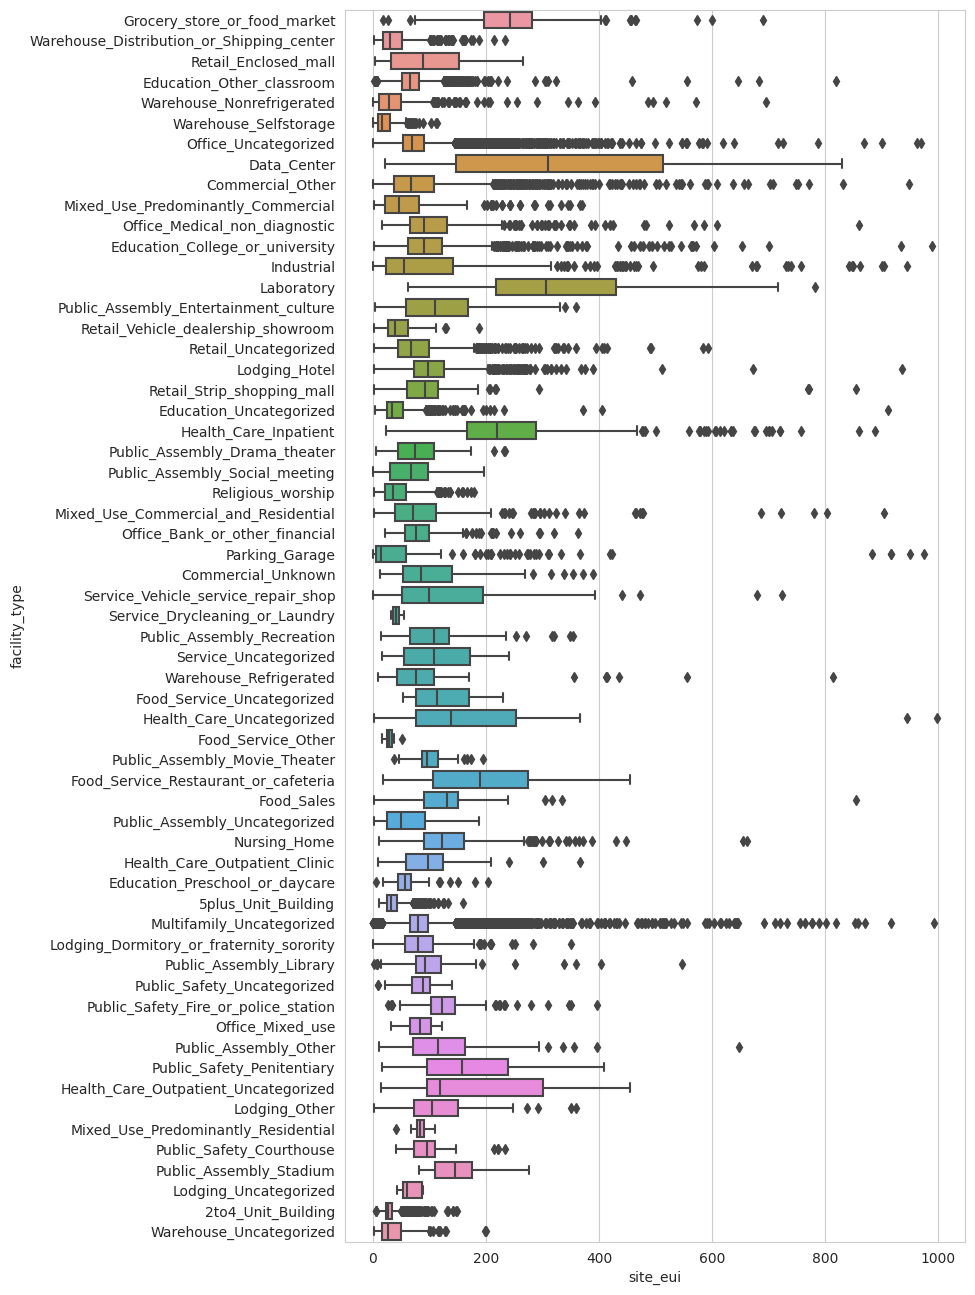

In [112]:
plt.figure(figsize=(8,16))
sns.boxplot(y='facility_type',x='site_eui',data=train)